In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import linregress


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("data.csv",low_memory=False)
df

,NDVI,VH_dB,VV_dB,VV+VH_dB,Angle,Entropy,Anisotropy,Alpha,BDOP,S0,...,PRVI,PRVI_dB,NSE,Height(cm),Moisture,NDVI.1,Ph_dB,Pv_dB,Pg_dB,TP_dB
0,0.226436,-16.314144,-10.057621,-9.134691,39.852330,0.737923,0.583434,19.984830,0.609102,0.040791,...,0.009134,-20.393509,0.208293,4.1,30.607867,0.226436,-25.056366,-15.810294,-19.419828,-13.894341
1,0.217098,-17.825817,-10.066216,-9.393611,40.088814,0.733275,0.588432,19.733809,0.486805,0.037073,...,0.008466,-20.722997,0.208941,5.9,20.472243,0.217098,-27.803886,-14.512660,-44.315080,-14.309401
2,0.319920,-16.458443,-9.032728,-8.310613,40.269970,0.676831,0.642943,16.429810,0.665675,0.052175,...,0.007557,-21.216755,0.327122,7.0,28.028434,0.319920,-34.603879,-14.649138,-17.558510,-12.825389
3,0.344729,-16.690370,-10.343152,-9.437440,39.645832,0.740572,0.580593,20.361393,0.567491,0.042015,...,0.009267,-20.330415,0.251294,3.3,23.558691,0.344729,-23.896591,-15.272930,-20.840132,-13.765982
4,0.252422,-15.871244,-9.984612,-8.988386,39.469680,0.756622,0.563793,21.596079,0.534514,0.040434,...,0.012044,-19.192176,0.243441,3.0,23.749005,0.252422,-19.733833,-16.451581,-21.448593,-13.932533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.622606,-10.819327,-6.556392,-5.174251,40.825386,0.725443,0.596265,19.945745,0.680049,0.094445,...,0.026494,-15.768492,0.696444,45.5,20.572739,0.622606,-15.248828,-16.506573,-13.743792,-10.248201
114,0.554830,-12.397919,-7.822566,-6.523379,40.791060,0.739795,0.581693,20.955751,0.574981,0.077485,...,0.024469,-16.113831,0.639842,39.5,21.478774,0.554830,-19.102996,-13.241382,-17.500183,-11.107804
115,0.617500,-11.215163,-6.409141,-5.168430,41.030980,0.744700,0.576564,21.101816,0.551469,0.088162,...,0.033906,-14.697239,0.735095,43.2,22.282249,0.617500,-19.238592,-12.106163,-18.334518,-10.547169
116,0.776826,-12.318463,-6.341491,-5.363631,41.065884,0.747786,0.573159,21.599478,0.588107,0.084523,...,0.024151,-16.170621,0.688206,41.0,19.693802,0.776826,-19.377221,-12.786325,-16.917642,-10.730262


In [3]:
nwdf=df[['VH_dB','VV_dB','Angle','Height(cm)']]

In [4]:
nwdf

,VH_dB,VV_dB,Angle,Height(cm)
0,-16.314144,-10.057621,39.852330,4.1
1,-17.825817,-10.066216,40.088814,5.9
2,-16.458443,-9.032728,40.269970,7.0
3,-16.690370,-10.343152,39.645832,3.3
4,-15.871244,-9.984612,39.469680,3.0
...,...,...,...,...
113,-10.819327,-6.556392,40.825386,45.5
114,-12.397919,-7.822566,40.791060,39.5
115,-11.215163,-6.409141,41.030980,43.2
116,-12.318463,-6.341491,41.065884,41.0


In [5]:
start=nwdf.iloc[:32]
# try:
#     # Attempt conversion, ignoring errors (e.g., non-numeric values)
#   start.iloc[:, start.columns.get_loc('VH_dB')] = pd.to_numeric(start['VH_dB'], errors='coerce')

# except:
#     pass
# try:
#     # Attempt conversion, ignoring errors (e.g., non-numeric values)
#   nwdf.iloc[:, start.columns.get_loc('VV_dB')] = pd.to_numeric(start['VV_dB'], errors='coerce')

# except:
#     pass
# try:
#     # Attempt conversion, ignoring errors (e.g., non-numeric values)
#   nwdf.iloc[:, start.columns.get_loc('Angle')] = pd.to_numeric(start['Angle'], errors='coerce')

# except:
#     pass
# try:
#     # Attempt conversion, ignoring errors (e.g., non-numeric values)
#   nwdf.iloc[:, start.columns.get_loc('Height(cm)')] = pd.to_numeric(start['Height(cm)'], errors='coerce')

# except:
#     pass
data_types = start.dtypes

print(data_types)

VH_dB         float64
VV_dB         float64
Angle         float64
Height(cm)    float64
dtype: object


In [6]:
#start
vv_values=np.power(10,start['VV_dB']/20)
start.loc[:, 'vv']=vv_values

/tmp/ipykernel_48382/197507129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start.loc[:, 'vv']=vv_values


In [7]:
lam=3*(0.1)/(5.405)

# start[eps]=(1/(0.046*np.tan(start['Angle'])))*np.log(((start['VV_dB']*math.pow(10,2.35)/(lam))*(np.sin(start['Angle'])/(math.pow(np.cos(start['Angle']),3)))*(1/math.pow((2*math.pi*math.pow(np.sin(start['Angle']),3)/lam),1.1))))

f=(1 / (0.046 * np.tan(np.deg2rad(start['Angle']))))
start.loc[:, 'f'] = f
h=0.005
# Other calculations (assuming they are also element-wise)
s=  np.log(((start['vv'] * math.pow(10, 2.35)) / (math.pow(lam, 0.7))) *
                                (np.sin(np.deg2rad(start['Angle'])) / (np.cos(np.deg2rad(start['Angle']))**3)) *
                                (1 / np.power((2 *h* math.pi * (np.sin(np.deg2rad(start['Angle']))**3) / lam), 1.1)))
start.loc[:, 's'] = s
prod=f*s
start['eps']=prod


/tmp/ipykernel_48382/3980298454.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start.loc[:, 'f'] = f
/tmp/ipykernel_48382/3980298454.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start.loc[:, 's'] = s
/tmp/ipykernel_48382/3980298454.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [8]:
start

,VH_dB,VV_dB,Angle,Height(cm),vv,f,s,eps
0,-16.314144,-10.057621,39.852330,4.1,0.314137,26.043710,8.719735,227.094265
1,-17.825817,-10.066216,40.088814,5.9,0.313826,25.826279,8.717800,225.148333
2,-16.458443,-9.032728,40.269970,7.0,0.353479,25.661156,8.836183,226.746665
3,-16.690370,-10.343152,39.645832,3.3,0.303978,26.235337,8.687838,227.928348
4,-15.871244,-9.984612,39.469680,3.0,0.316788,26.400126,8.730058,230.474622
5,-17.514816,-10.443191,39.243340,3.1,0.300497,26.613680,8.678621,230.970037
6,-18.005825,-9.410162,40.609380,3.7,0.338448,25.355077,8.791888,222.919005
7,-20.268690,-11.892271,40.970562,3.6,0.254323,25.033974,8.505640,212.929979
8,-20.268690,-11.892271,40.970562,4.0,0.254323,25.033974,8.505640,212.929979
9,-19.987650,-11.102733,41.236860,6.1,0.278524,24.800198,8.596452,213.193710


In [9]:
start['ssm']=(-5.3*0.01)+2.92*0.01*start['eps']-(5.5*0.0001*(start['eps']*start['eps']))+(4.3*0.000001*start['eps']*start['eps']*start['eps'])

/tmp/ipykernel_48382/3085456834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start['ssm']=(-5.3*0.01)+2.92*0.01*start['eps']-(5.5*0.0001*(start['eps']*start['eps']))+(4.3*0.000001*start['eps']*start['eps']*start['eps'])


In [10]:
start

,VH_dB,VV_dB,Angle,Height(cm),vv,f,s,eps,ssm
0,-16.314144,-10.057621,39.852330,4.1,0.314137,26.043710,8.719735,227.094265,28.573803
1,-17.825817,-10.066216,40.088814,5.9,0.313826,25.826279,8.717800,225.148333,27.717479
2,-16.458443,-9.032728,40.269970,7.0,0.353479,25.661156,8.836183,226.746665,28.419522
3,-16.690370,-10.343152,39.645832,3.3,0.303978,26.235337,8.687838,227.928348,28.946355
4,-15.871244,-9.984612,39.469680,3.0,0.316788,26.400126,8.730058,230.474622,30.104311
5,-17.514816,-10.443191,39.243340,3.1,0.300497,26.613680,8.678621,230.970037,30.333247
6,-18.005825,-9.410162,40.609380,3.7,0.338448,25.355077,8.791888,222.919005,26.758348
7,-20.268690,-11.892271,40.970562,3.6,0.254323,25.033974,8.505640,212.929979,22.740509
8,-20.268690,-11.892271,40.970562,4.0,0.254323,25.033974,8.505640,212.929979,22.740509
9,-19.987650,-11.102733,41.236860,6.1,0.278524,24.800198,8.596452,213.193710,22.840840


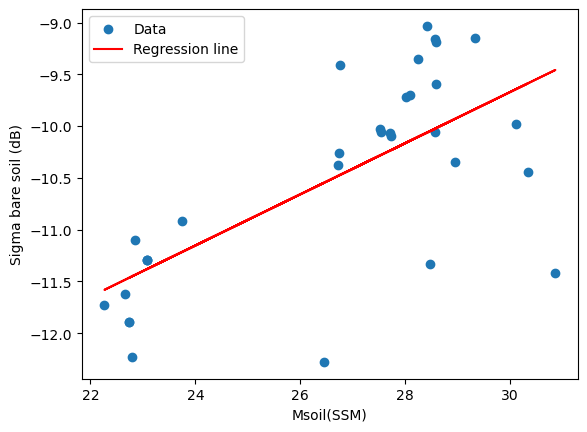

C = -17.083965338986474
D = 0.24711106987968953
r value= 0.6806005372574525


In [12]:
sigma = start['VV_dB'].values
ssm = start['ssm'].values

# Perform linear regression


# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ssm, sigma)

# Calculate C and D
C = intercept
D = slope

# Plot the data points
plt.scatter(ssm, sigma, label='Data')

# Plot the regression line
plt.plot(ssm, intercept + slope * ssm, color='red', label='Regression line')

# Add labels and legend
plt.xlabel('Msoil(SSM)')
plt.ylabel('Sigma bare soil (dB)')
plt.legend()

# Show plot
plt.show()

# Print the results
print("C =", C)
print("D =", D)
print("r value=", r_value)